## How to do it...

1. Import required libraries

In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler

2. Set prediction horizon and network hyperparameters

In [27]:
prediction_days = 60
nof_units = 4

3. Encapsulate model creation within a function

In [28]:
def create_model(nunits):
    
    # Initializing the RNN
    regressor = Sequential()
    
    # Adding the input layer and the LSTM layer
    regressor.add(LSTM(units=nunits, activation='sigmoid', input_shape=(None, 1)))
    
    # Add output layer
    regressor.add(Dense(units = 1))
    
    # Compiling the RNN
    regressor.compile(optimizer='adam', loss='mean_squared_error')
    
    return regressor

4. Load data

In [29]:
# Import the dataset and encode the date
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df['date'] = pd.to_datetime(df['Timestamp'], unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

5. Split data into train and test

In [30]:
df_train = Real_Price[:len(Real_Price)-prediction_days]
df_test = Real_Price[len(Real_Price)-prediction_days:]

6. Apply preprocessing to improve convergence

In [31]:
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))

sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

7. Fit model

In [32]:
regressor = create_model(nunits = nof_units)
regressor.fit(X_train, y_train, batch_size=5, epochs=100)

Epoch 1/100
663/663 [==============================] - 1s 1ms/step - loss: 0.0129
Epoch 2/100
663/663 [==============================] - 1s 1ms/step - loss: 0.0078
Epoch 3/100
663/663 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 4/100
663/663 [==============================] - 1s 1ms/step - loss: 0.0013
Epoch 5/100
663/663 [==============================] - 1s 1ms/step - loss: 3.2707e-04
Epoch 6/100
663/663 [==============================] - 1s 1ms/step - loss: 1.2027e-04
Epoch 7/100
663/663 [==============================] - 1s 1ms/step - loss: 9.9372e-05
Epoch 8/100
663/663 [==============================] - 1s 1ms/step - loss: 9.5801e-05
Epoch 9/100
663/663 [==============================] - 1s 1ms/step - loss: 9.1653e-05
Epoch 10/100
663/663 [==============================] - 1s 1ms/step - loss: 8.6146e-05
Epoch 11/100
663/663 [==============================] - 1s 1ms/step - loss: 8.3207e-05
Epoch 12/100
663/663 [==============================] - 1s 1ms/step 

663/663 [==============================] - 1s 1ms/step - loss: 4.9846e-05
Epoch 94/100
663/663 [==============================] - 1s 1ms/step - loss: 4.9340e-05
Epoch 95/100
663/663 [==============================] - 1s 1ms/step - loss: 4.9757e-05
Epoch 96/100
663/663 [==============================] - 1s 1ms/step - loss: 4.8823e-05
Epoch 97/100
663/663 [==============================] - 1s 1ms/step - loss: 5.0074e-05
Epoch 98/100
663/663 [==============================] - 1s 1ms/step - loss: 4.9156e-05
Epoch 99/100
663/663 [==============================] - 1s 1ms/step - loss: 4.9535e-05
Epoch 100/100
663/663 [==============================] - 1s 1ms/step - loss: 4.9896e-05


8. Using the trained model, we create a time series prediction over the horizon

In [33]:
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

9. View prediction results

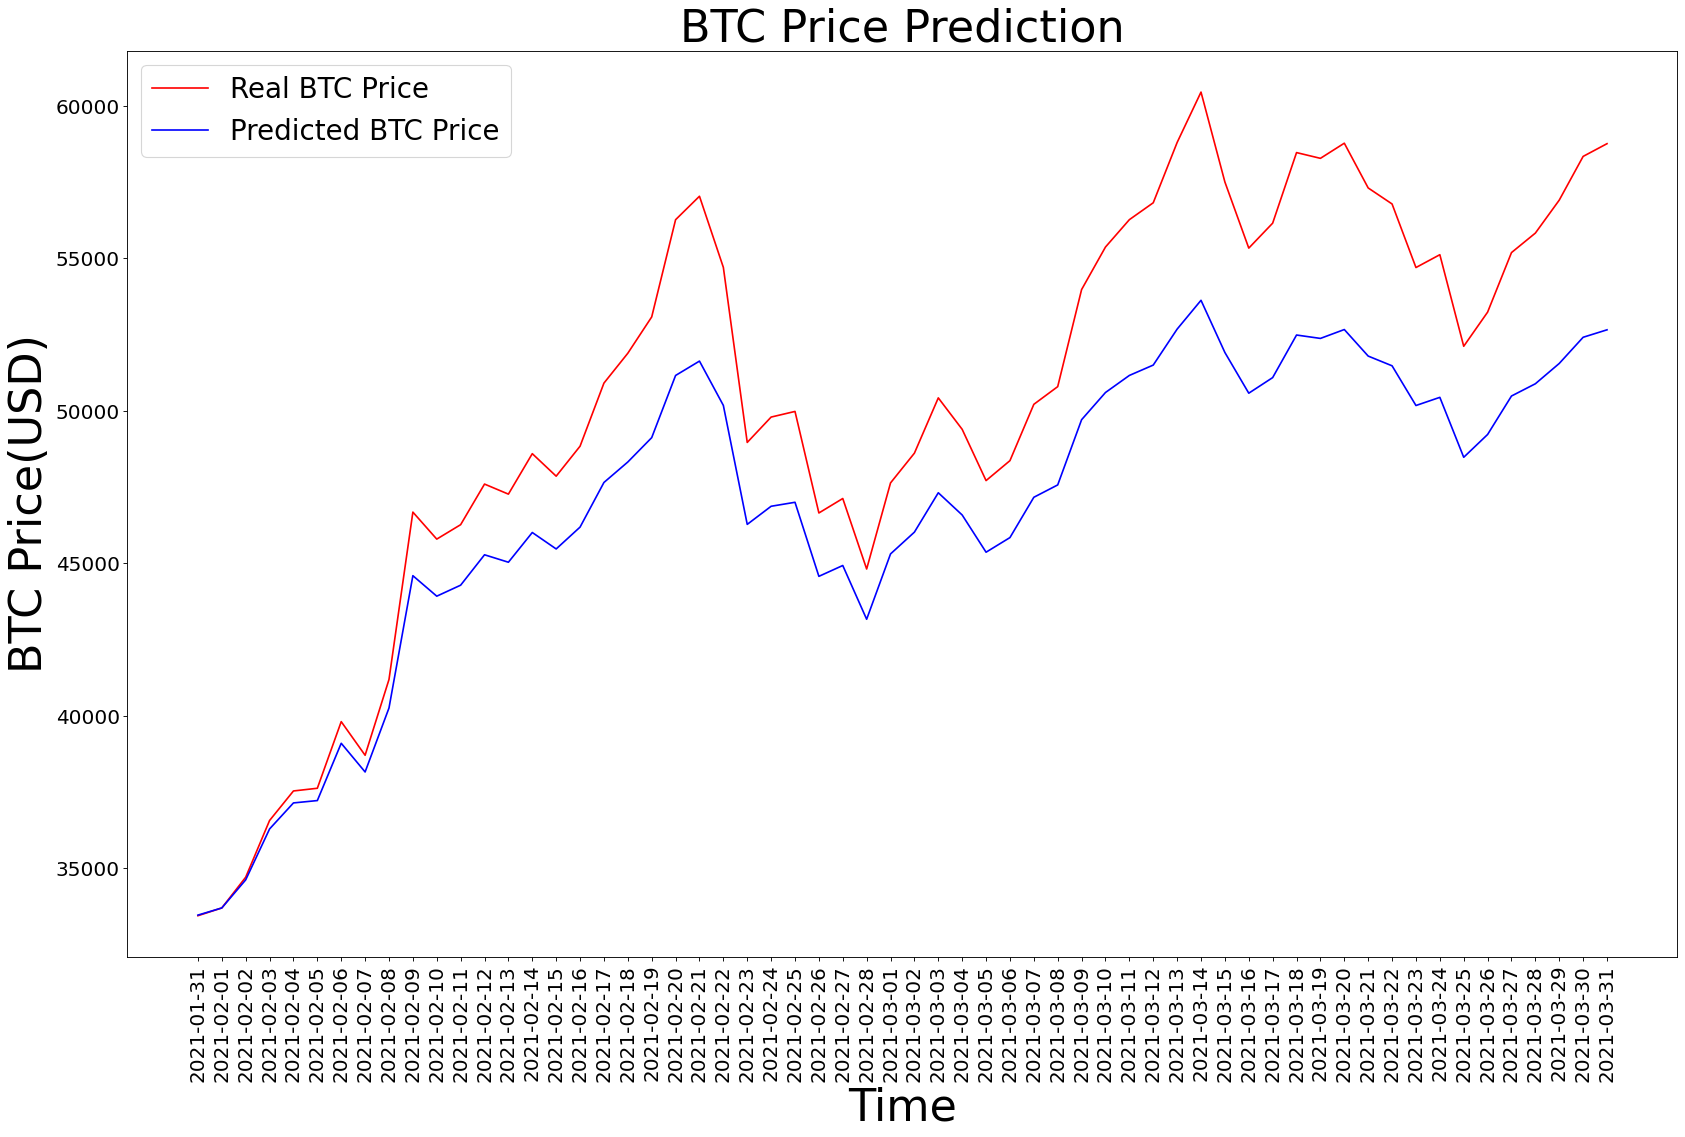

In [34]:
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.plot(test_set, color='red', label='Real BTC Price')
plt.plot(predicted_BTC_price, color='blue', label='Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x = df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()